In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("supply_chain_data.csv")

In [3]:
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
data.shape

(100, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [6]:
data.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [7]:
data.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [8]:
summary_stats = data[['Price','Revenue generated', 'Stock levels', 'Lead time', 'Defect rates']].describe()

In [9]:
summary_stats

,Price,Revenue generated,Stock levels,Lead time,Defect rates
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.462461,5776.048187,47.770000,17.080000,2.277158
std,31.168193,2732.841744,31.369372,8.846251,1.461366
min,1.699976,1061.618523,0.000000,1.000000,0.018608
25%,19.597823,2812.847151,16.750000,10.000000,1.009650
50%,51.239831,6006.352023,47.500000,18.000000,2.141863
75%,77.198228,8253.976921,73.000000,25.000000,3.563995
max,99.171329,9866.465458,100.000000,30.000000,4.939255


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

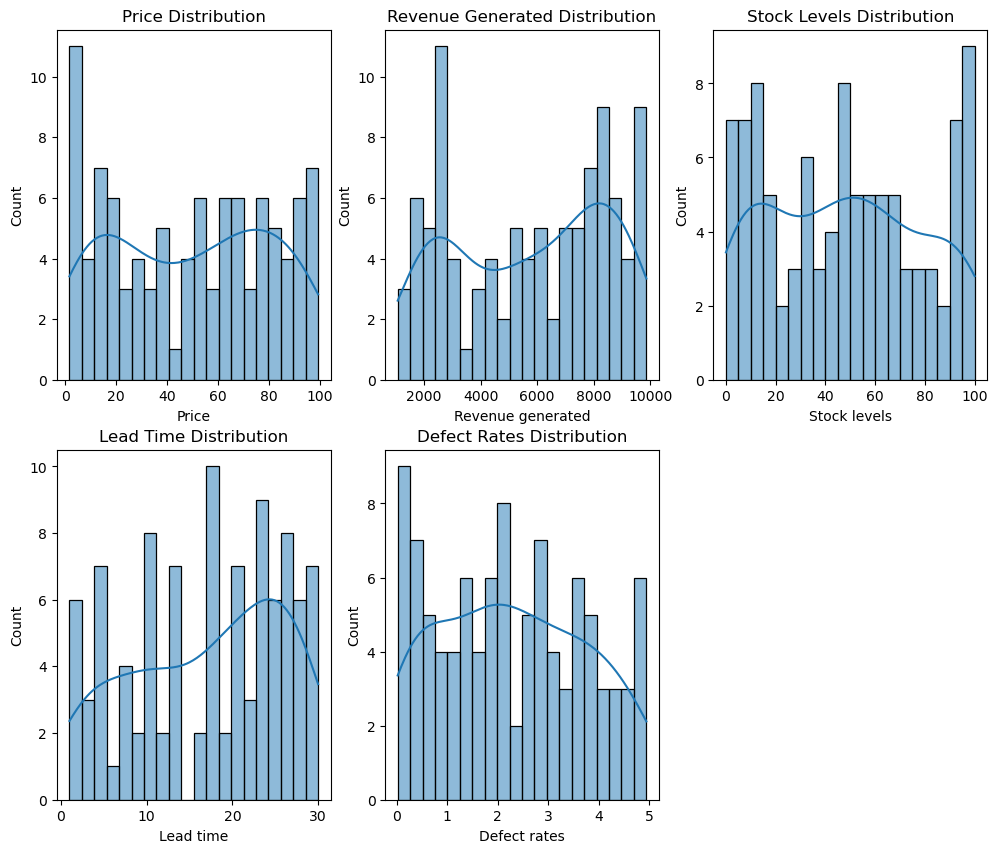

In [16]:
plt.figure(figsize=(12,10))

plt.subplot(2,3,1)
sns.histplot(data['Price'], bins = 20, kde = True)
plt.title('Price Distribution')

plt.subplot(2,3,2)
sns.histplot(data['Revenue generated'], bins= 20, kde = True)
plt.title('Revenue Generated Distribution')

plt.subplot(2,3,3)
sns.histplot(data['Stock levels'], bins= 20, kde = True)
plt.title('Stock Levels Distribution')

plt.subplot(2,3,4)
sns.histplot(data['Lead time'], bins= 20, kde = True)
plt.title('Lead Time Distribution')

plt.subplot(2,3,5)
sns.histplot(data['Defect rates'], bins= 20, kde = True)
plt.title('Defect Rates Distribution')

plt.show()

In [17]:
total_sales_revenue = data['Revenue generated'].sum()
total_sales_revenue

577604.8187380086

In [19]:
segment_sales = data.groupby('Customer demographics')['Revenue generated'].sum().reset_index()
segment_sales = segment_sales.sort_values(by = 'Revenue generated', ascending= False)
print(segment_sales)

  Customer demographics  Revenue generated
3               Unknown      173090.133837
0                Female      161514.489122
1                  Male      126634.394260
2            Non-binary      116365.801520


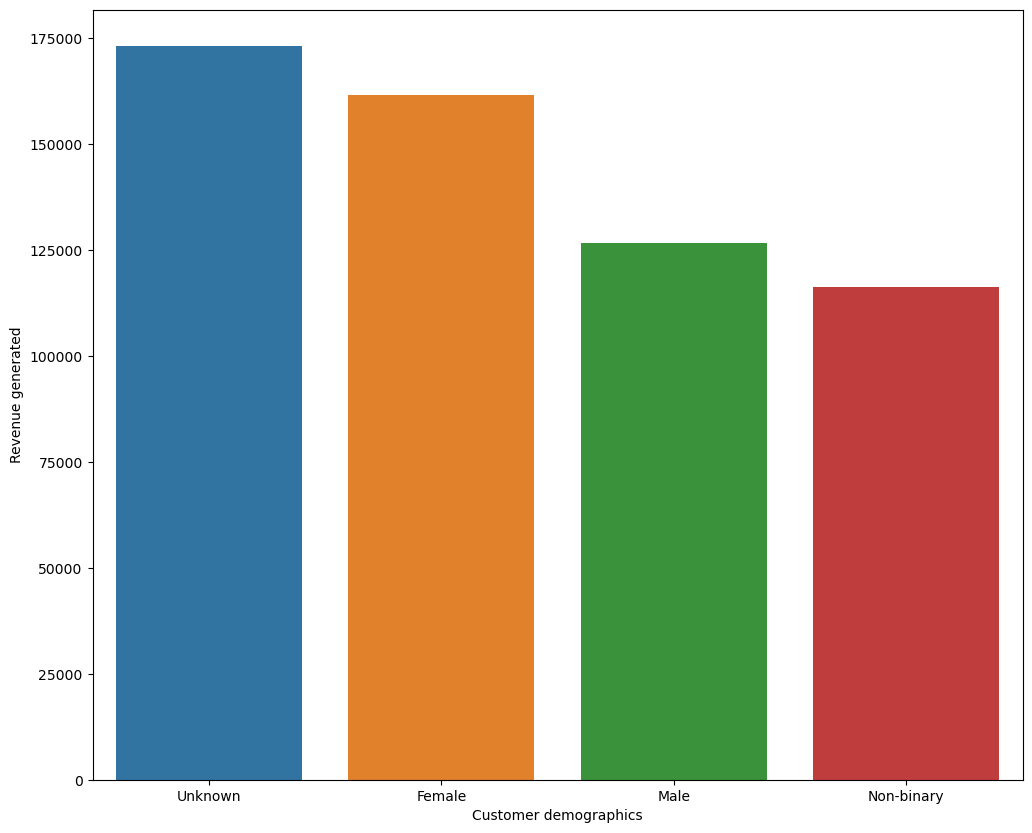

In [31]:
plt.figure(figsize= (12,10))

sns.barplot(x = segment_sales['Customer demographics'],
            y = segment_sales['Revenue generated'],
            )
plt.show()

In [32]:
product_sales = data.groupby('Product type')['Revenue generated'].sum().reset_index()

In [ ]:
plt.figure(figsize=(12,10))

sns.barplot(x = segment_sales['Customer demographics'],
            y = segment_sales['Revenue generated'],
            )
plt.show()

In [21]:
data.groupby('Location')['Revenue generated'].sum().reset_index()

,Location,Revenue generated
0,Bangalore,102601.723882
1,Chennai,119142.815748
2,Delhi,81027.701225
3,Kolkata,137077.551005
4,Mumbai,137755.026877


In [23]:
data.groupby('Transportation modes')['Revenue generated'].sum().reset_index()

,Transportation modes,Revenue generated
0,Air,155735.349650
1,Rail,164990.417667
2,Road,159315.232239
3,Sea,97563.819181


In [24]:
data.groupby('Routes')['Revenue generated'].sum().reset_index()

,Routes,Revenue generated
0,Route A,253198.852380
1,Route B,204484.007893
2,Route C,119921.958465
